In [1]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import csv
import folium

%matplotlib inline

In [41]:
read = pd.read_csv ('transport-nodes.csv')
read.head(12)

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [42]:
read = pd.read_csv('transport-relationships.csv')
read.head(15)

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


In [43]:
#un tableau pour recuperer toutes les villes

ville = []
i=0
while i<12:
    ville.append((df['id'][i]))
    i=i+1
print(ville)

['Amsterdam', 'Utrecht', 'Den Haag', 'Immingham', 'Doncaster', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'London', 'Rotterdam', 'Gouda']


In [44]:

population = []
i=0
while i<12:
    population.append((df['population'][i])//1000)
    i=i+1
print(population)

[821, 334, 514, 9, 302, 9, 23, 133, 104, 8787, 623, 70]


In [45]:
#garder les noeuds et leurs destinations dans une liste
listNoeuds = []
i=0
while i<15:
    listNoeuds.append((str(dh['src'][i]),str(dh['dst'][i])))
    i=i+1

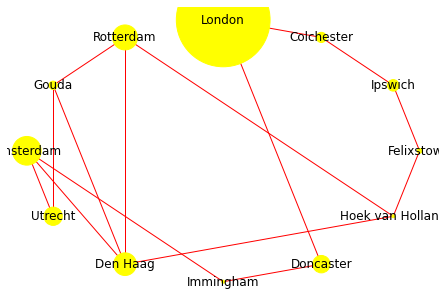

In [46]:
dessiner = nx.Graph()
i = 0
while i<12:
    dessiner.add_node(df['id'][i])
    i=i+1
dessiner.add_edges_from(listNoeuds)
nx.draw_shell(dessiner, with_labels=True,node_size=population, node_color='yellow',edge_color='red')


In [47]:
dict(dessiner.nodes.data())


{'Amsterdam': {},
 'Utrecht': {},
 'Den Haag': {},
 'Immingham': {},
 'Doncaster': {},
 'Hoek van Holland': {},
 'Felixstowe': {},
 'Ipswich': {},
 'Colchester': {},
 'London': {},
 'Rotterdam': {},
 'Gouda': {}}

In [48]:
AjoutDict = {}
def AjouterAttribut(myGraph,dfnode,NameAtt,Index):
    i=0
    while i<12:
        AjoutDict[(dfnode[Index][i])] = ({NameAtt : dfnode[NameAtt][i] })
        i=i+1
        nx.set_node_attributes(myGraph, AjoutDict)

In [49]:
AjouterAttribut(dessiner,df,'population','id')
AjouterAttribut(dessiner,df,'latitude','id')
AjouterAttribut(dessiner,df,'longitude','id')

In [50]:
dict(dessiner.nodes.data())

{'Amsterdam': {'population': 821752,
  'latitude': 52.379189,
  'longitude': 4.899431},
 'Utrecht': {'population': 334176,
  'latitude': 52.092876,
  'longitude': 5.10448},
 'Den Haag': {'population': 514861,
  'latitude': 52.078663,
  'longitude': 4.288788},
 'Immingham': {'population': 9642,
  'latitude': 53.61239,
  'longitude': -0.22219},
 'Doncaster': {'population': 302400,
  'latitude': 53.52285,
  'longitude': -1.13116},
 'Hoek van Holland': {'population': 9382,
  'latitude': 51.9775,
  'longitude': 4.13333},
 'Felixstowe': {'population': 23689,
  'latitude': 51.96375,
  'longitude': 1.3511},
 'Ipswich': {'population': 133384, 'latitude': 52.05917, 'longitude': 1.15545},
 'Colchester': {'population': 104390,
  'latitude': 51.88921,
  'longitude': 0.90421},
 'London': {'population': 8787892,
  'latitude': 51.509865,
  'longitude': -0.118092},
 'Rotterdam': {'population': 623652,
  'latitude': 51.9225,
  'longitude': 4.47917},
 'Gouda': {'population': 70939, 'latitude': 52.01667, 

In [51]:
for i in dessiner.nodes:
    basemap = folium.Map(location = [dessiner.nodes[i]['latitude'], dessiner.nodes[i]['longitude']],
        tiles='Stamen Toner', width='%100', height='%100', zoom_start=5)

In [2]:
basemap

NameError: name 'basemap' is not defined

In [53]:
#Ajout de marqueurs pour tous les noeuds du reseau avec folium.Marker
def marker(desssiner):
    for i in dessiner.nodes:
        folium.Marker([dessiner.nodes[i]['latitude'],dessiner.nodes[i]['longitude']],zoom_start=5).add_to(basemap)
    return basemap

In [3]:
marker(dessiner)

NameError: name 'marker' is not defined

In [4]:
def construirePointsImage(dessiner):
    points=[]
    for i in dessiner.nodes:
        for neighbor in dessiner.neighbors(i):
            points.append([[dessiner.nodes[i]['latitude'], dessiner.nodes[i]['longitude']], [dessiner.nodes[neighbor]['latitude'], dessiner.nodes[neighbor]['longitude']]])
    return points

In [56]:
coordonneesvoisins = construirePointsImage(dessiner)
print(coordonneesvoisins)


[[[52.379189, 4.899431], [52.092876, 5.10448]], [[52.379189, 4.899431], [52.078663, 4.288788]], [[52.379189, 4.899431], [53.61239, -0.22219]], [[52.092876, 5.10448], [52.379189, 4.899431]], [[52.092876, 5.10448], [52.01667, 4.70833]], [[52.078663, 4.288788], [52.379189, 4.899431]], [[52.078663, 4.288788], [51.9225, 4.47917]], [[52.078663, 4.288788], [51.9775, 4.13333]], [[52.078663, 4.288788], [52.01667, 4.70833]], [[53.61239, -0.22219], [52.379189, 4.899431]], [[53.61239, -0.22219], [53.52285, -1.13116]], [[53.52285, -1.13116], [53.61239, -0.22219]], [[53.52285, -1.13116], [51.509865, -0.118092]], [[51.9775, 4.13333], [52.078663, 4.288788]], [[51.9775, 4.13333], [51.96375, 1.3511]], [[51.9775, 4.13333], [51.9225, 4.47917]], [[51.96375, 1.3511], [51.9775, 4.13333]], [[51.96375, 1.3511], [52.05917, 1.15545]], [[52.05917, 1.15545], [51.96375, 1.3511]], [[52.05917, 1.15545], [51.88921, 0.90421]], [[51.88921, 0.90421], [52.05917, 1.15545]], [[51.88921, 0.90421], [51.509865, -0.118092]], [[

In [57]:
def visualiserFolium(dessiner, points, locationpardefaut = [52.3791890, 4.899431], tiles='Stamen Toner', explored = None ):
    base = folium.vector_layers.PolyLine(points, color='yellow', weight=3).add_to(basemap)
    return base

In [21]:
visualiserFolium(dessiner, coordonneesvoisins )

In [22]:
basemap

In [176]:
#PARTIE 2
# Implementer la classe Noeud
class Noeud:
    def __init__(self,name):
        self.name= name
        self.attributs={}
        self.listeNomVoisin=[]
        
    def setAttribut(self,key,values):
        self.attributs[key]=values
        
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    
    def egal(self,noeud):
        if self.name == noeud.getName():
            return True
        return False
    
    def getCoutMin(self):
        pass
    
    def getCout(self,noeud):
        pass

In [177]:
#Implementer la Classe graphe

class Graphe:
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
       
  
    def creerNoeuds(self,fichiernoeuds):
        tmp=[]
        with open(fichiernoeuds,'r') as file:
            readAll=csv.DictReader(file)
            for i in readAll:
                newNoeud=Noeud(i['id'])
                newNoeud.setAttribut('latitude',i['latitude'])
                newNoeud.setAttribut('longitude',i['longitude'])
                newNoeud.setAttribut('population',i['population'])
                self.noeuds.append(newNoeud)
                self.arcs[newNoeud.getName()]=[]
            for i in self.noeuds:
                tmp.append(i.getName())
        return tmp
   
    def creerArc(self,fichierarcs):
        arcs=[]
        dic={}
        with open(fichierarcs, 'r') as file:
            readAll=csv.DictReader(file)
            for i in readAll:
                dic['src']= i['src']
                dic['dst']= i['dst']
                dic['relationship'] = i['relationship']
                dic['cost'] = i['cost']
                tmp=dic.copy()
                arcs+=[tmp]
                for x in self.noeuds :
                    if x.getName()== i['src']:
                        tuple=(i['dst'],i['cost'])
                        x.listeNomVoisin.append(tuple)
#                         print(x.listeNomVoisin)
#             for p in self.noeuds:
#                 print(p.listeNomVoisin)
            for i,j in self.arcs.items():
                for n in arcs:
                    if i==n['src']:
                        j.append(n['dst'])
            
        return arcs
    
    def getNoeud(self,name):
        for get in self.noeuds:
            if get.getName()==name:
                return get
        return 'Introuvable'
    
    def getVoisins(self, noeud):
        Voisins=noeud.listeNomVoisin.copy()
        mesVoisins=[]
        for get in Voisins:
            mesVoisins+=[self.getNoeud(get[0])]
#             print(mesVoisins[0].getName())
        return mesVoisins
    
    def getCoordonnesVoisins(self,noeud):
        noeudVoisins=self.getVoisins(noeud)
        listCoordonnes=[]
        for i in noeudVoisins:
            tmp=(float(i.getAttribut('latitude')),float(i.getAttribut('longitude')))
#             if (len(tmp)!=0):
            listCoordonnes+=[tmp]
            
        return listCoordonnes
    
    def getListeCoordonnees(self,listeNoeud):
        all=[]
        for i in listeNoeud:
            getNoeudCoord=(float(self.getNoeud(i).getAttribut('latitude')),float(self.getNoeud(i).getAttribut('longitude')))
            all.append(getNoeudCoord)
        return all
    
    def visualiserFolium(self):
        table=[]
        m = folium.Map(location=[52.3791890, 4.899431],tiles='Stamen Toner',explored=None)
        tooltip = "Clicker!"
        for i in self.noeuds:
            folium.Marker([i.getAttribut('latitude'),i.getAttribut('longitude')], popup=i.getName(), tooltip=tooltip,color="#3186cc").add_to(m)
        return m
    
    
#     def visualiserFolium_noeud(self, explored=(parcoursDFS(x,x.noeuds[1],x.noeuds[4]))):
# #         point=self.getListeCoordonnees(explored)
# #         folium.PolyLine(point,color="red").add_to(m)
# #         print(p)
#         return explored
#         

In [178]:
#TEST
x = Graphe()
# x.read("transport-nodes.csv")
# print(x.read("transport-nodes.csv"))
x.creerNoeuds("transport-nodes.csv")
# x.creerArc("transport-relationships.csv")
# n=x.getNoeud('Doncaster')
# o=x.getNoeud('Immingham')
# x.getVoisins(n)
# liste=['Amsterdam','Utrecht','Den Haag','Immingham','Doncaster','Hoek van Holland']
# x.getCoordonnesVoisins(n)
# x.getListeCoordonnees(liste)
# x.visualiserFolium_noeuds()
# parcoursDFS(x,n,o)
# x.visualiserFolium()

['Amsterdam',
 'Utrecht',
 'Den Haag',
 'Immingham',
 'Doncaster',
 'Hoek van Holland',
 'Felixstowe',
 'Ipswich',
 'Colchester',
 'London',
 'Rotterdam',
 'Gouda']

In [179]:
x.creerArc("transport-relationships.csv")

[{'src': 'Amsterdam', 'dst': 'Utrecht', 'relationship': 'EROAD', 'cost': '46'},
 {'src': 'Amsterdam',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': '59'},
 {'src': 'Den Haag',
  'dst': 'Rotterdam',
  'relationship': 'EROAD',
  'cost': '26'},
 {'src': 'Amsterdam',
  'dst': 'Immingham',
  'relationship': 'EROAD',
  'cost': '369'},
 {'src': 'Immingham',
  'dst': 'Doncaster',
  'relationship': 'EROAD',
  'cost': '74'},
 {'src': 'Doncaster', 'dst': 'London', 'relationship': 'EROAD', 'cost': '277'},
 {'src': 'Hoek van Holland',
  'dst': 'Den Haag',
  'relationship': 'EROAD',
  'cost': '27'},
 {'src': 'Felixstowe',
  'dst': 'Hoek van Holland',
  'relationship': 'EROAD',
  'cost': '207'},
 {'src': 'Ipswich',
  'dst': 'Felixstowe',
  'relationship': 'EROAD',
  'cost': '22'},
 {'src': 'Colchester',
  'dst': 'Ipswich',
  'relationship': 'EROAD',
  'cost': '32'},
 {'src': 'London',
  'dst': 'Colchester',
  'relationship': 'EROAD',
  'cost': '106'},
 {'src': 'Gouda', 'dst': 'Rotterdam',

In [180]:
x.visualiserFolium()

In [181]:
#Partie 3
#Implementation de la pile

class Pile():
    def __init__(self):
        self.elements=[]
        
    def push(self,noeud):
        self.elements.append(noeud)
        return noeud
    def contains_noeud(self, name):
        if name in self.elements:
            return True 
        else: return False
        
    def empty(self):
        return len(self.elements) == 0
    
    def remove(self):
        return self.elements.pop()
        
    
f=Pile()
# print(f.empty())
f.push("Mohamed")
f.push("Mohaed")
f.push("Mohamd")
f.push("Mohame")
# print(f.empty())
print(f.elements)
f.remove()
print(f.elements)
# # print(f.contains_noeud("Mohamd")
# f.contains_noeud("Mohamd")


['Mohamed', 'Mohaed', 'Mohamd', 'Mohame']
['Mohamed', 'Mohaed', 'Mohamd']


In [182]:
#Partie 3
#Implementation de la file
class File(Pile):
    def remove(self):
        return self.elements.pop(0)
    
f=File()
# print(f.empty())
f.push("Mohamed")
f.push("Mohaed")
f.push("Mohamd")
f.push("Mohame")
# print(f.empty())
print(f.elements)
f.remove()
print(f.elements)
# # print(f.contains_noeud("Mohamd")
# f.contains_noeud("Mohamd")

['Mohamed', 'Mohaed', 'Mohamd', 'Mohame']
['Mohaed', 'Mohamd', 'Mohame']


In [183]:
#Partie 4 Implementer les algorithmes de parcours de graphe: BFS ET DFS

# BFS :


visiter = [] # Liste des noeuds explores.
frontiere = []     #file

def bfs(visiter, graphe, noeud):
    visiter.append(noeud)
    frontiere.append(noeud)
    while frontiere:
        s = frontiere.pop(0) 
        print (s) 
        for i in graphe[s]:
            if i not in visiter:
                visiter.append(i)
                frontiere.append(i)

# TEST



In [184]:
# dfs

def dfs(graphe,noeud,visiter=[]):
    visiter +=[noeud]
    for i in graphe[noeud]:
        if i not in visiter:
            visiter=dfs(graphe,i,visiter)        
    return visiter
# test

In [187]:
# #PARCOURS DFS

def parcoursDFS(myGraphe, noeudsrc,noeuddst):
    srcName=noeudsrc.getName()
    dstName=noeuddst.getName()
    cpt=0
    for key in myGraphe.noeuds:
        cpt+=cpt
        if key.egal(noeudsrc):
            cpt=0
#             print("Source existe")
        if key.egal(noeuddst):
            cpt=0
#             print(" Destination existe")
#     print(cpt)
#             return "Name don't exis!!t"
    if cpt ==0:
        visiter=[]
        frontiere=[srcName]
        while (len(frontiere) != 0):
            s=frontiere.pop()

            if s not in visiter:
                visiter.append(s)
                if s==dstName:
                    break


            if s not in myGraphe.arcs:
                print("nosee")
                continue 

            for i in myGraphe.arcs[s]:
                  frontiere.append(i)
        print("Liste des noeuds explores")

        return visiter  #"->".join(visiter) #
   




In [193]:
# n=x.getNoeud('Doncaster')
# o=x.getNoeud('Immingham')
parcoursDFS(x,x.noeuds[2],x.noeuds[6])

Liste des noeuds explores


['Den Haag', 'Gouda', 'Utrecht', 'Rotterdam']